# Import Libraries

In [1]:
import sys
sys.path.append('../../gemgis')
import geopandas as gpd
import rasterio
import gemgis as gg

print(gg)

<module 'gemgis' from '../../gemgis\\gemgis.py'>


# Read Vector Files - Polygons

# Read Vector Files - Points

In [2]:
interfaces = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/interfaces.shp')

In [3]:
interfaces.crs

{'init': 'epsg:4326'}

In [4]:
interfaces.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
18    Point
19    Point
20    Point
21    Point
22    Point
23    Point
24    Point
25    Point
26    Point
27    Point
28    Point
29    Point
30    Point
31    Point
32    Point
33    Point
34    Point
35    Point
36    Point
37    Point
38    Point
39    Point
40    Point
dtype: object

In [5]:
interfaces.head()

,id,formation,geometry
0,None,Ton,POINT (19.150 293.313)
1,None,Ton,POINT (61.934 381.459)
2,None,Ton,POINT (109.358 480.946)
3,None,Ton,POINT (157.812 615.999)
4,None,Ton,POINT (191.318 719.094)


## Extract X,Y coordinates

In [6]:
interfaces = gg.extract_xy_values(interfaces)
interfaces.head()

,id,formation,geometry,X,Y
0,None,Ton,POINT (19.150 293.313),19.150128,293.313485
1,None,Ton,POINT (61.934 381.459),61.934367,381.459326
2,None,Ton,POINT (109.358 480.946),109.357860,480.945568
3,None,Ton,POINT (157.812 615.999),157.812299,615.999430
4,None,Ton,POINT (191.318 719.094),191.318028,719.093981


# Load Vector Data - LineString

In [7]:
topo = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/Topography.shp')

In [8]:
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


## Extract X,Y coordinates

In [9]:
topo = gg.extract_xy_values(topo)
topo.head()

,id,Z,geometry,points,X,Y
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(0.7408806771479846, 475.44101474698454)",0.740881,475.441015
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(35.62873136073459, 429.2469161566801)",35.628731,429.246916
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(77.30033078835194, 340.0890755208477)",77.300331,340.089076
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(104.75836141895252, 269.34426719024157)",104.758361,269.344267
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77....","(127.04782157791061, 207.64445718500974)",127.047822,207.644457


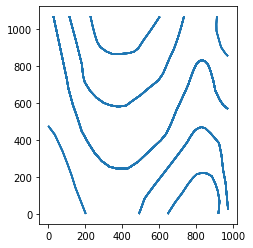

In [10]:
topo.plot()

# Read Digital Elevation Model

In [11]:
dem = rasterio.open('C:/Users/user_abuser/Desktop/Kartenkunde/Task1_modifiziert.tif')
dem

<open DatasetReader name='C:/Users/user_abuser/Desktop/Kartenkunde/Task1_modifiziert.tif' mode='r'>

In [12]:
interfaces = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/interfaces.shp')

In [13]:
interfaces = gg.extract_z_values(interfaces, dem)
interfaces.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.150128,293.313485,115
1,None,Ton,POINT (61.934 381.459),61.934367,381.459326,254
2,None,Ton,POINT (109.358 480.946),109.357860,480.945568,61
3,None,Ton,POINT (157.812 615.999),157.812299,615.999430,24
4,None,Ton,POINT (191.318 719.094),191.318028,719.093981,0


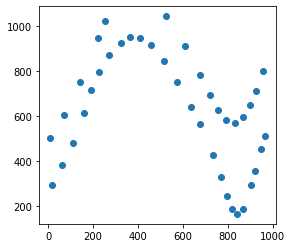

In [14]:
interfaces = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/interfaces.shp')
interfaces.plot()

In [15]:
interfaces = gg.extract_coordinates(interfaces, dem)
interfaces.head()

,id,formation,geometry,X,Y,Z
0,None,Ton,POINT (19.150 293.313),19.150128,293.313485,115
1,None,Ton,POINT (61.934 381.459),61.934367,381.459326,254
2,None,Ton,POINT (109.358 480.946),109.357860,480.945568,61
3,None,Ton,POINT (157.812 615.999),157.812299,615.999430,24
4,None,Ton,POINT (191.318 719.094),191.318028,719.093981,0


In [16]:
dem = rasterio.open('C:/Users/user_abuser/Desktop/Kartenkunde/Task1_modifiziert.tif')
dem.crs

CRS.from_dict(init='epsg:4326')

In [17]:
topo = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/Topography.shp')
del topo['Z']
topo.head()

,id,geometry
0,None,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


In [18]:
topo.crs == dem.crs

True

In [19]:
topo = gg.extract_coordinates(topo, dem)
topo

CRSError: CRS is invalid: None

# Save as GemPy df

In [ ]:
interfaces = gg.convert_to_gempy_df(interfaces)
interfaces.head()

In [ ]:
interfaces['dip'] = 50
interfaces['azimuth'] = 100

In [ ]:
orientations= gg.convert_to_gempy_df(interfaces)
orientations.head()

# Define Custom Sections

In [ ]:
custom_sections = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/Custom_Section_1.shp')

In [ ]:
custom_sections

In [ ]:
custom_sections['section_name'] = 'Section1'
custom_sections

In [ ]:
section_dict = gg.to_section_dict(custom_sections, 'section_name')
section_dict

In [ ]:
import pandas as pd
sections = pd.concat([custom_sections,custom_sections,custom_sections])
sections['section_name'].iloc[2] ='Section2'
sections['section_name'].iloc[3] ='Section2'
sections['section_name'].iloc[4] ='Section3'
sections['section_name'].iloc[5] ='Section3'
sections

In [ ]:
section_dict = gg.to_section_dict(sections, 'section_name')
section_dict

# Interpolate Raster

In [20]:
topo = gpd.read_file('C:/Users/user_abuser/Desktop/Kartenkunde/Topography.shp')
topo.head()

,id,Z,geometry
0,None,400,"LINESTRING (0.741 475.441, 35.629 429.247, 77...."
1,None,300,"LINESTRING (645.965 0.525, 685.141 61.866, 724..."
2,None,400,"LINESTRING (490.292 0.525, 505.756 40.732, 519..."
3,None,600,"LINESTRING (911.433 1068.585, 908.856 1026.831..."
4,None,700,"LINESTRING (228.432 1068.585, 239.772 1017.037..."


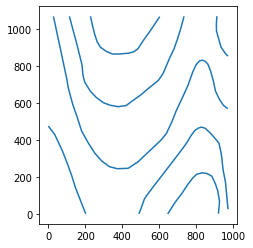

In [21]:
topo.plot()

In [22]:
array = gg.interpolate_raster(topo)

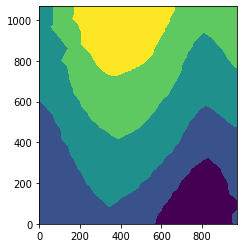

In [23]:
import matplotlib.pyplot as plt
plt.imshow(array, origin='lower')

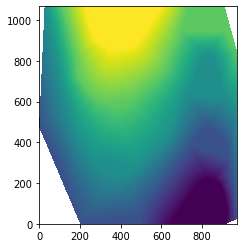

In [24]:
array = gg.interpolate_raster(topo, method = 'linear')
plt.imshow(array, origin='lower')

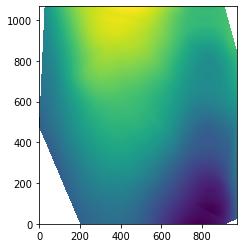

In [25]:
array = gg.interpolate_raster(topo, method = 'cubic')
plt.imshow(array, origin='lower')

# Create GemPyData Object

In [ ]:
data = gg.GemPyData()
print(data.crs)

In [ ]:
data.crs = 'EPSG:4326'
data.crs

In [ ]:
data = gg.GemPyData(crs = 'EPSG:4326')
print(data.crs)

In [ ]:
data.interfaces = interfaces
data.interfaces.head()

In [ ]:
data.orientations = orientations
data.orientations.head()

In [ ]:
data.section_dict = section_dict
data.section_dict

In [ ]:
data.